In [1]:
import glob

import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
from matplotlib import cm

from matplotlib.dates import DateFormatter

# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

#from IPython.display import set_matplotlib_formats
#set_matplotlib_formats('svg') # set it here to 'png' or 'svg'

import seaborn as sns
#sns.set()
# Use white grid plot background from seaborn
sns.set(style="whitegrid")



In [2]:
DATES = ["15 Jun","16 Jun","17 Jun","18 Jun","21 Jun","22 Jun","23 Jun","24 Jun","25 Jun","29 Jun","30 Jun","01 Jun","02 Jun"]
DATE_FORMATTER = tick.FuncFormatter(lambda x,p: DATES[x])

actions = pd.concat((pd.read_csv(f) for f in sorted(glob.glob("logs-2021-*/actions.csv"))))



people = pd.concat((pd.read_csv(f) for f in sorted(glob.glob("logs-2021-*/people.csv"))))

children = pd.concat((pd.read_csv(f) for f in sorted(glob.glob("logs-2021-*/nb_children.csv"))))

moods = pd.concat((pd.read_csv(f) for f in sorted(glob.glob("logs-2021-*/moods.csv"))))

# process timestamp, and index dataframes by time
for df in [actions, people, children, moods]:
    del df["level"]
    df["time"] = pd.to_datetime(df.time, unit="s")
    df["day"] = df.time.dt.floor('D')
    df["timeofday"] = pd.Timestamp(0) + (df.time - df.day)
    
    del df["time"]
    
    df.set_index("timeofday", inplace=True)
    
    

# dataframe containing only the people who have been 'recognised' by the robot
users = people.loc[(people["user_id"] != -1) & (people["user_id"] != 0)]

In [3]:
people

,person_id,user_id,x,y,z,x_world,y_world,z_world,looking_at_robot,engaged,age,day
timeofday,,,,,,,,,,,,
1970-01-01 08:44:52.787008000,5933,-1,0.600819,0.476078,1.288513,-1.485479,0.546711,1.288513,0.000000,seen,child,2021-06-15
1970-01-01 08:44:53.737517056,5933,-1,0.555188,0.481914,1.345984,-1.457658,0.510075,1.345984,0.000000,seen,child,2021-06-15
1970-01-01 08:44:54.743941120,5933,-1,0.555188,0.481914,1.345984,-1.457318,0.603369,1.575342,0.777778,engaging,child,2021-06-15
1970-01-01 08:44:55.681817088,5933,0,0.555188,0.481914,1.345984,-1.457318,0.603369,1.575342,0.777778,engaging,child,2021-06-15
1970-01-01 08:44:56.613306880,5933,0,0.000000,0.000000,0.000000,-1.457318,0.603369,1.575342,0.000000,disappearing,child,2021-06-15
...,...,...,...,...,...,...,...,...,...,...,...,...
1970-01-01 13:52:35.138387968,77967,0,-0.328127,0.912612,1.415437,-0.877523,-0.239000,1.415437,0.177778,seen,child,2021-06-21
1970-01-01 13:52:36.256207872,77967,0,0.000000,0.000000,0.000000,-0.877523,-0.239000,1.415437,0.000000,disappearing,child,2021-06-21
1970-01-01 13:52:37.243848960,77967,0,0.000000,0.000000,0.000000,-0.877523,-0.239000,1.415437,0.000000,disappearing,child,2021-06-21


Percentage of people who were 'recognised' by the robot (ie, assigned a `user_id`):

In [4]:
len(users)/len(people) * 100

37.205044751830755

# How long people interacted with the robot?

In [5]:
people.reset_index(inplace=True)

# only keep auto-detected children
people = people[people.person_id > 0]

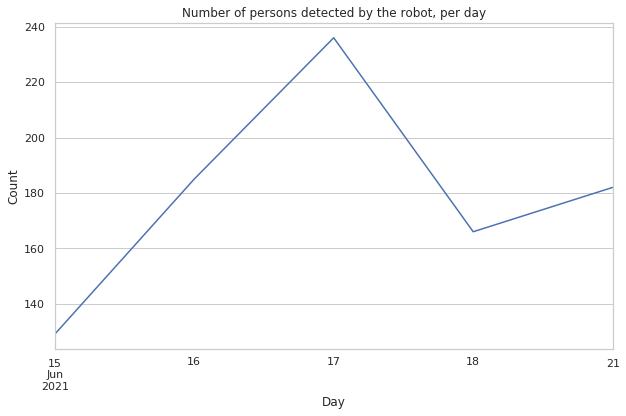

In [6]:
fig, ax = plt.subplots(figsize=(10, 6))

people.groupby("day").nunique().person_id.plot()

ax.set(xlabel="Day",
       ylabel="Count",
       title="Number of persons detected by the robot, per day")
pass

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


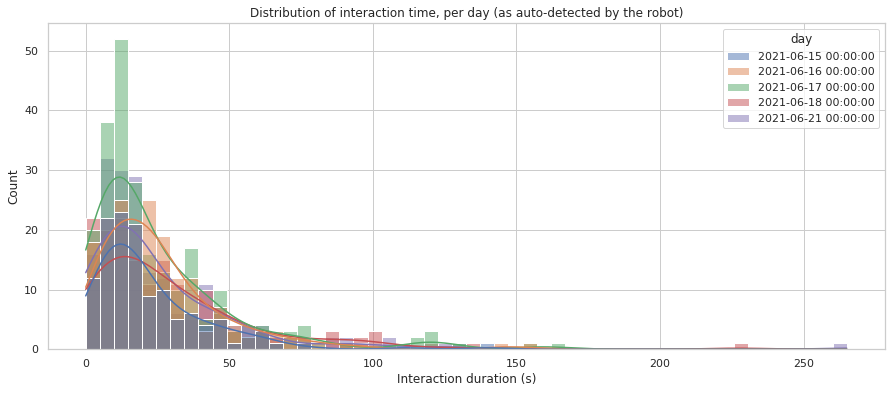

In [7]:
interaction_time = (people.groupby(["day", "person_id"])["timeofday"].max() - people.groupby(["day", "person_id"])["timeofday"].min()).astype('timedelta64[s]').reset_index()
interaction_time.rename(columns={"timeofday":"duration"}, inplace=True)

# filter out ouliers
#interaction_time = interaction_time[interaction_time.duration < 10000]

fig, ax = plt.subplots(figsize=(15, 6))

sns.histplot(interaction_time, x="duration",hue="day",kde=True)

ax.set(xlabel="Interaction duration (s)",
       ylabel="Count",
       title="Distribution of interaction time, per day (as auto-detected by the robot)")
pass

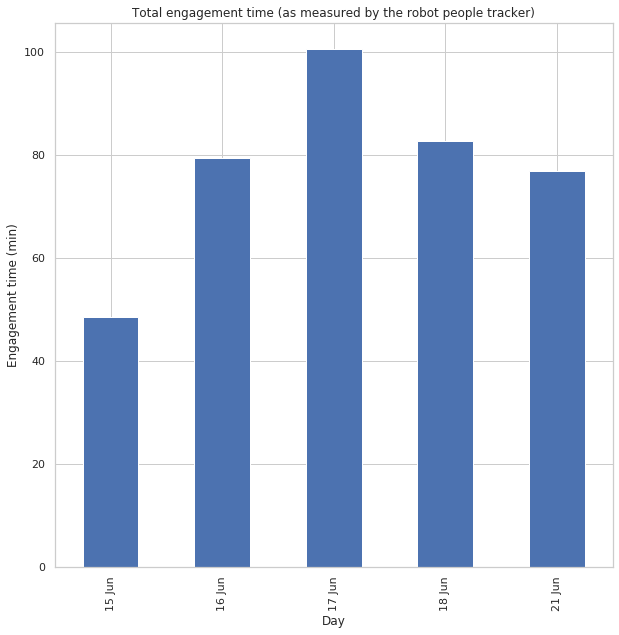

In [39]:
fig, ax = plt.subplots(figsize=(10,10))


(interaction_time.groupby("day").duration.sum()/60).plot.bar()

ax.xaxis.set_major_formatter(DATE_FORMATTER)

ax.set(xlabel="Day",
       ylabel="Engagement time (min)",
       title="Total engagement time (as measured by the robot people tracker)")
pass

Descriptive stats on duration of tracking:

In [9]:
df.describe()

,nb_children
count,141.000000
mean,1.375887
std,0.996702
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,6.000000


# Where were the people?

/home/severin/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


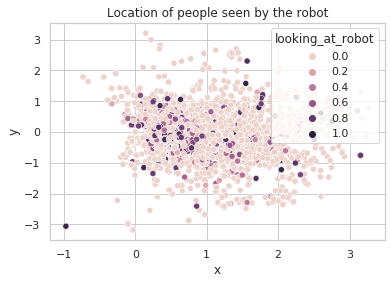

In [10]:
_ = sns.scatterplot(people.x, people.y, hue=people.looking_at_robot).set_title("Location of people seen by the robot")

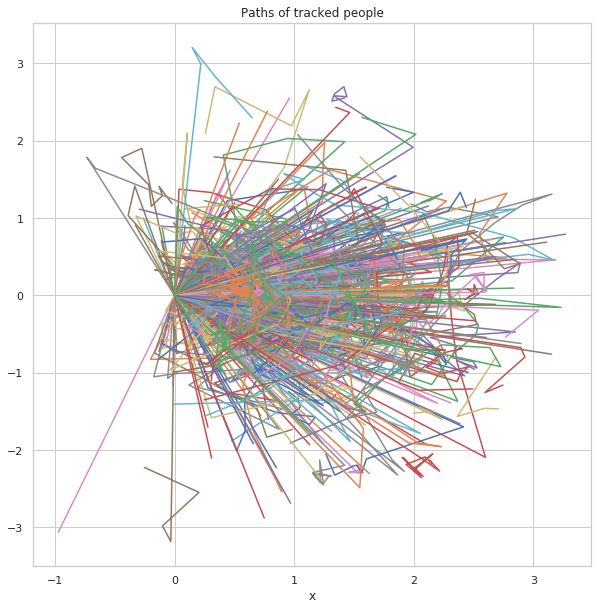

In [11]:
fig, ax = plt.subplots(figsize=(10,10))
_ = people.groupby("person_id").plot.line("x", "y", ax=ax,legend=False,title="Paths of tracked people")

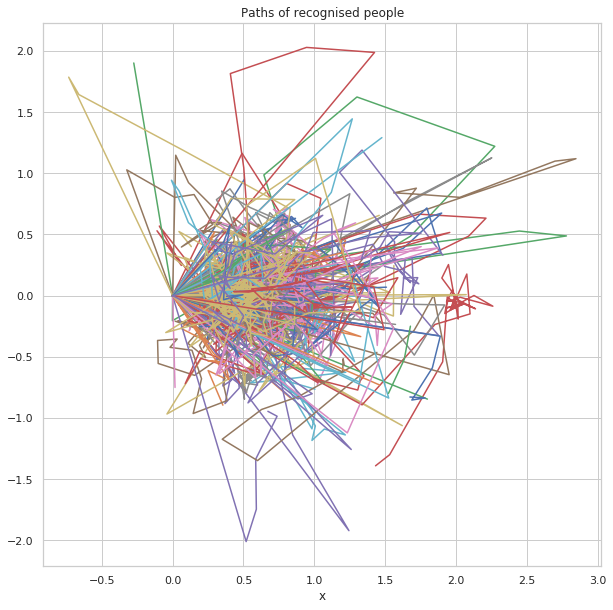

In [12]:
fig, ax = plt.subplots(figsize=(10,10))
_ = users.groupby("user_id").plot.line("x", "y", ax=ax,legend=False, title="Paths of recognised people")

# How many children interacted with the robot?

In [13]:
children

,nb_children,day
timeofday,,
1970-01-01 08:37:07.606162944,1,2021-06-15
1970-01-01 08:37:11.284563968,0,2021-06-15
1970-01-01 08:37:25.642936832,1,2021-06-15
1970-01-01 08:37:34.114775040,0,2021-06-15
1970-01-01 08:44:44.870235904,1,2021-06-15
...,...,...
1970-01-01 13:46:47.897586944,0,2021-06-21
1970-01-01 13:47:30.216470016,1,2021-06-21
1970-01-01 13:47:59.041904896,2,2021-06-21


### Raw data: number of children engaged with the robot over time

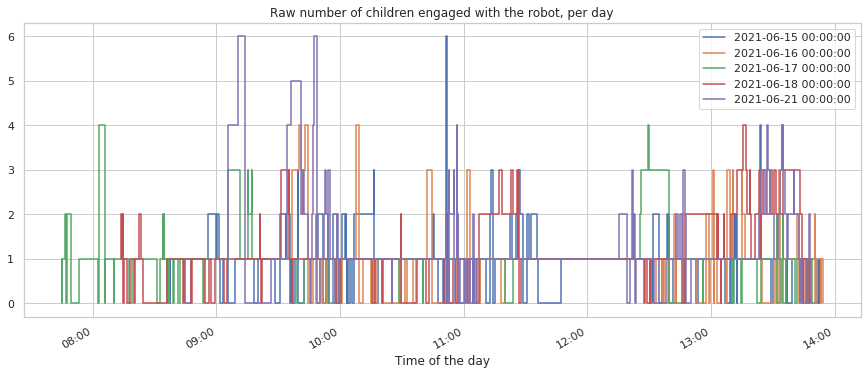

In [14]:
fig, ax = plt.subplots(figsize=(15, 6))
# Define the date format
date_form = DateFormatter("%H:%M")
ax.xaxis.set_major_formatter(date_form)

children.groupby("day").nb_children.plot(drawstyle='steps-pre', legend=True)

ax.set(xlabel="Time of the day",
       title="Raw number of children engaged with the robot, per day")
pass

### Cumulative sum of children interacting with the robot

In [15]:
children["increase"] = children.nb_children.diff().fillna(0).clip(0)
children["cumsum"] = children.groupby("day").increase.cumsum()

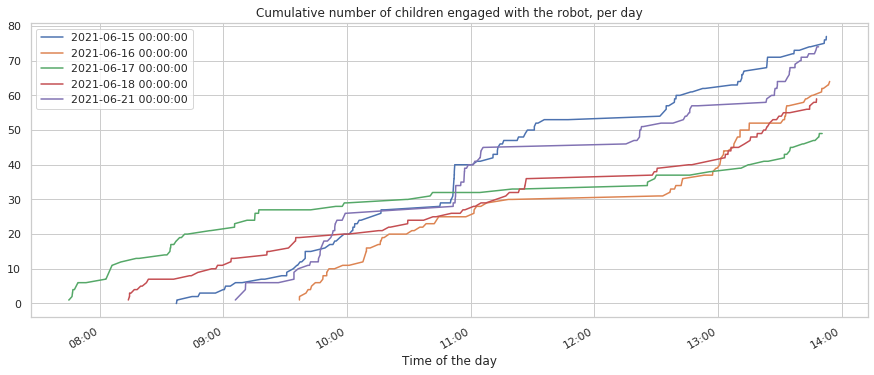

In [16]:
fig, ax = plt.subplots(figsize=(15, 6))
# Define the date format
date_form = DateFormatter("%H:%M")
ax.xaxis.set_major_formatter(date_form)

children.groupby("day")["cumsum"].plot(legend=True)

ax.set(xlabel="Time of the day",
       title="Cumulative number of children engaged with the robot, per day")
pass

### Computation of # of children interacting with the robot in a given time window

In a given time window, the number of interacting children is equal to the number of children interacting with the robot when the window starts + the sum of children joining the interaction over the window. For instance:
  - t0: 2 children present
  - t1: 1 child present
  - t3: 2 children present -> 1 child joined
  - t4: 4 children present -> 2 more children joined
  
  => 2 + 1 + 2 = 5 children who interacted with the robot during that time window
  
This computation is performed independently for each day.
 

In [17]:
WINDOW="5min"

windows=pd.date_range(pd.Timestamp(0) + pd.Timedelta("07:30:00"), pd.Timestamp(0) + pd.Timedelta("15:15:00"), freq=WINDOW)
d = {'timeofday':[], 'interacting_children':[]}

def interacting_children_per_day(children):
    
    for i in range(len(windows)-1):

        # if no logs at that time, record 0 child and continue
        if windows[i] < children.index[0] or windows[i] > children.index[-1]:
            d['timeofday'].append(windows[i])
            d['interacting_children'].append(0)
            continue

        if i > 1:
            try:
                initial_nb_children = children[windows[i-1]:windows[i]].iloc[-1].nb_children
            except IndexError:
                initial_nb_children = 0    
        else:
            initial_nb_children = 0

        sum_increase = children[windows[i]:windows[i+1]].increase.sum()

        total_interacting_children = initial_nb_children + sum_increase
        
        d['timeofday'].append(windows[i])
        d['interacting_children'].append(total_interacting_children)

    df = pd.DataFrame(data=d)
    df = df.set_index('timeofday')
    return df

interacting_children = children.groupby("day").apply(interacting_children_per_day)
interacting_children.reset_index(inplace=True)

interacting_children


,day,timeofday,interacting_children
0,2021-06-15,1970-01-01 07:30:00,0.0
1,2021-06-15,1970-01-01 07:35:00,0.0
2,2021-06-15,1970-01-01 07:40:00,0.0
3,2021-06-15,1970-01-01 07:45:00,0.0
4,2021-06-15,1970-01-01 07:50:00,0.0
...,...,...,...
1390,2021-06-21,1970-01-01 14:50:00,0.0
1391,2021-06-21,1970-01-01 14:55:00,0.0
1392,2021-06-21,1970-01-01 15:00:00,0.0
1393,2021-06-21,1970-01-01 15:05:00,0.0


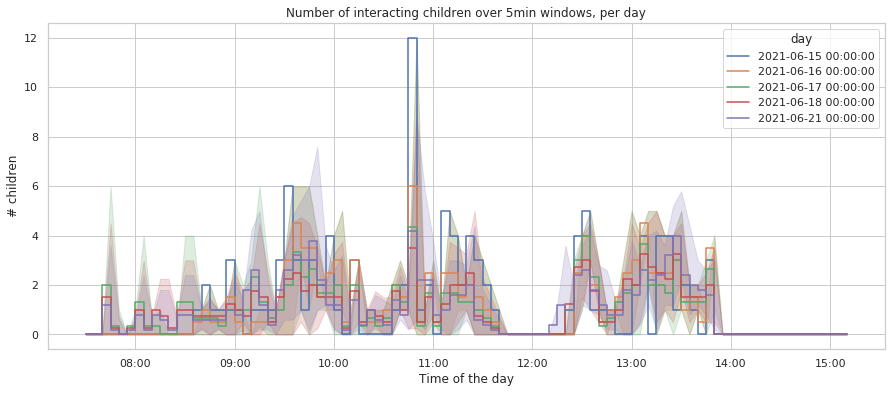

In [18]:
fig, ax = plt.subplots(figsize=(15, 6))
# Define the date format
date_form = DateFormatter("%H:%M")
ax.xaxis.set_major_formatter(date_form)

sns.lineplot(data=interacting_children,y="interacting_children",x="timeofday",hue="day", drawstyle="steps-pre")

ax.set(xlabel="Time of the day",
       ylabel="# children",
       title="Number of interacting children over %s windows, per day" % WINDOW)
pass

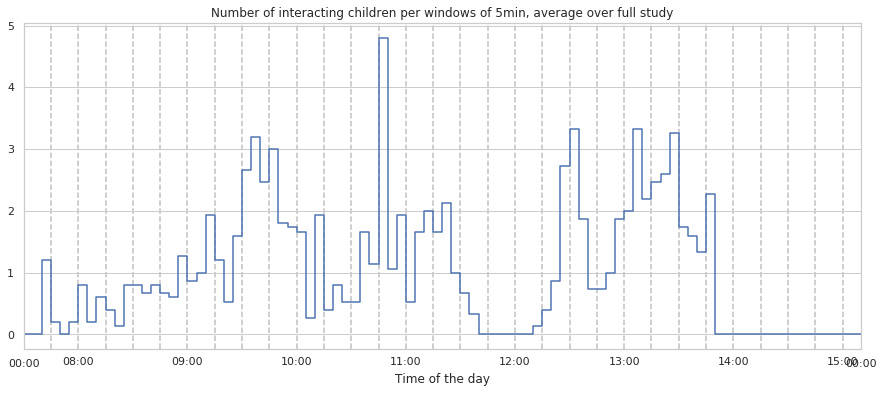

In [19]:
fig, ax = plt.subplots(figsize=(15, 6))

interacting_children.set_index("day").groupby("timeofday").mean().plot(ax=ax,drawstyle="steps-pre",legend=False)

# Define the date format
date_form = DateFormatter("%H:%M")
ax.xaxis.set_major_formatter(date_form)

ax.set(xlabel="Time of the day",
       title="Number of interacting children per windows of %s, average over full study" % WINDOW)

for xc in windows[::3]:
    ax.axvline(x=xc, color='silver', linestyle='--',zorder=0)

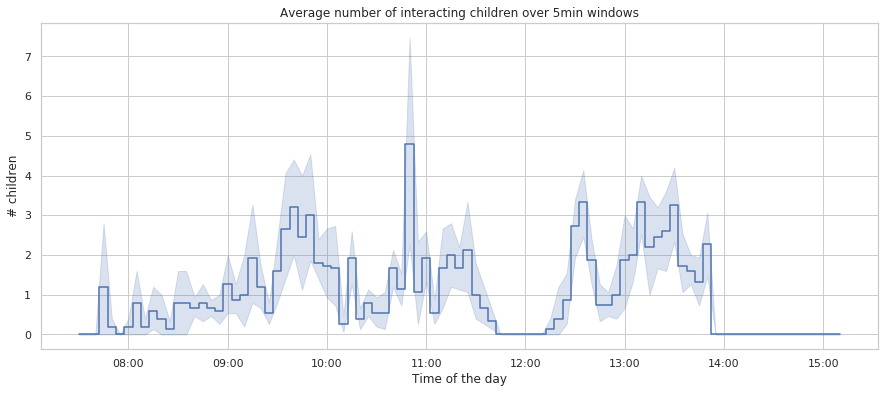

In [20]:
fig, ax = plt.subplots(figsize=(15, 6))
# Define the date format
date_form = DateFormatter("%H:%M")
ax.xaxis.set_major_formatter(date_form)

sns.lineplot(data=interacting_children,y="interacting_children",x="timeofday",drawstyle="steps-mid")

ax.set(xlabel="Time of the day",
       ylabel="# children",
       title="Average number of interacting children over %s windows" % WINDOW)
pass

In [21]:
children.head(30)

,nb_children,day,increase,cumsum
timeofday,,,,
1970-01-01 08:37:07.606162944,1,2021-06-15,0.0,0.0
1970-01-01 08:37:11.284563968,0,2021-06-15,0.0,0.0
1970-01-01 08:37:25.642936832,1,2021-06-15,1.0,1.0
1970-01-01 08:37:34.114775040,0,2021-06-15,0.0,1.0
1970-01-01 08:44:44.870235904,1,2021-06-15,1.0,2.0
1970-01-01 08:47:40.385935104,0,2021-06-15,0.0,2.0
1970-01-01 08:48:30.875675904,1,2021-06-15,1.0,3.0
1970-01-01 08:56:06.147011072,1,2021-06-15,0.0,3.0
1970-01-01 08:59:50.180205056,2,2021-06-15,1.0,4.0


In [22]:
d={"day":[], "nb_children": [], "duration":[]}

i = 0
nb_children = 0
start_time = None
while True:
    if i == len(children):
        break
       
    row = children.iloc[i]

    if row.nb_children > 0:
        if not start_time:
            start_time = row.name
        nb_children = max(nb_children, row.nb_children)
    else:
        d["day"].append(row.day)
        d["nb_children"].append(nb_children if nb_children < 6 else "6+")
        d["duration"].append(row.name - start_time)
        start_time = 0
        nb_children = 0
    
    i += 1
    

interactions_group = pd.DataFrame(d)
interactions_group["duration"] = interactions_group.duration.astype("timedelta64[s]")
interactions_group

,day,nb_children,duration
0,2021-06-15,1,3.0
1,2021-06-15,1,8.0
2,2021-06-15,1,175.0
3,2021-06-15,2,888.0
4,2021-06-15,1,193.0
...,...,...,...
158,2021-06-21,1,348.0
159,2021-06-21,3,423.0
160,2021-06-21,4,1199.0
161,2021-06-21,1,164.0


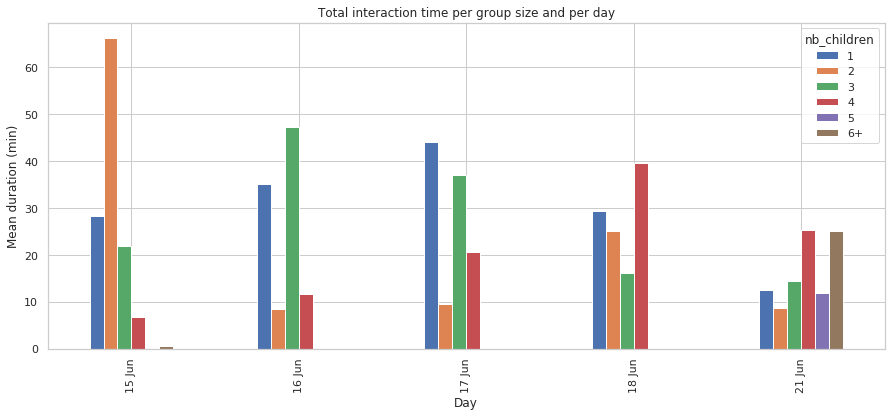

In [23]:
fig, ax = plt.subplots(figsize=(15, 6))


df=interactions_group.groupby(["day", "nb_children"]).duration.sum().to_frame().reset_index()
df["duration_min"]=df.duration/60

df.set_index(["day","nb_children"]).duration_min.unstack(1).plot.bar(ax=ax)


ax.xaxis.set_major_formatter(DATE_FORMATTER)

ax.set(xlabel="Day",
       ylabel="Mean duration (min)",
       title="Total interaction time per group size and per day")



pass

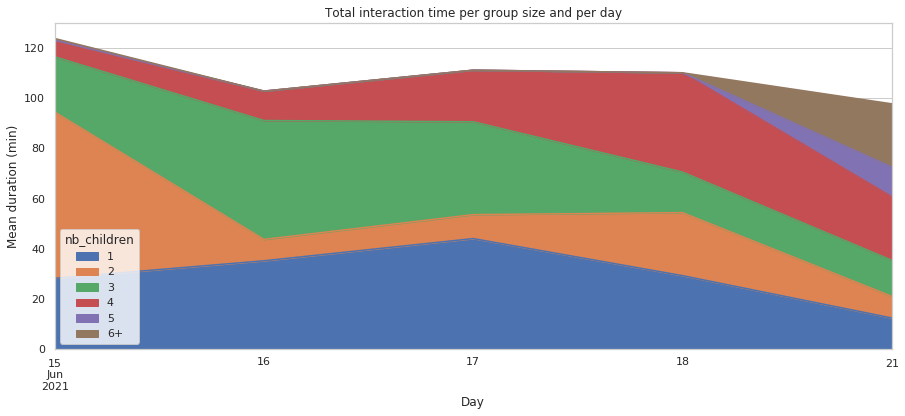

In [24]:
fig, ax = plt.subplots(figsize=(15, 6))

df=interactions_group.groupby(["day", "nb_children"]).duration.sum().to_frame().reset_index()
df["duration_min"]=df.duration/60

df.set_index(["day", "nb_children"])["duration_min"].unstack(1).plot.area(ax=ax)

# Define the date format
#date_form = DateFormatter("%d")
#ax.xaxis.set_major_formatter(date_form)

ax.set(xlabel="Day",
       ylabel="Mean duration (min)",
       title="Total interaction time per group size and per day")

pass

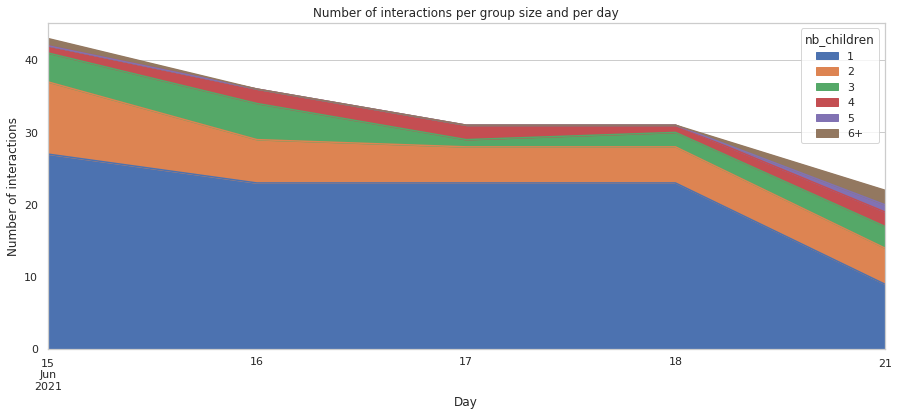

In [25]:
fig, ax = plt.subplots(figsize=(15, 6))

df=interactions_group.groupby(["day", "nb_children"]).count()
df.unstack(1).droplevel(0, axis=1).plot.area(ax=ax)

# Define the date format
#date_form = DateFormatter("%d %b")
#ax.xaxis.set_major_formatter(date_form)

ax.set(xlabel="Day",
       ylabel="Number of interactions",
       title="Number of interactions per group size and per day")

pass

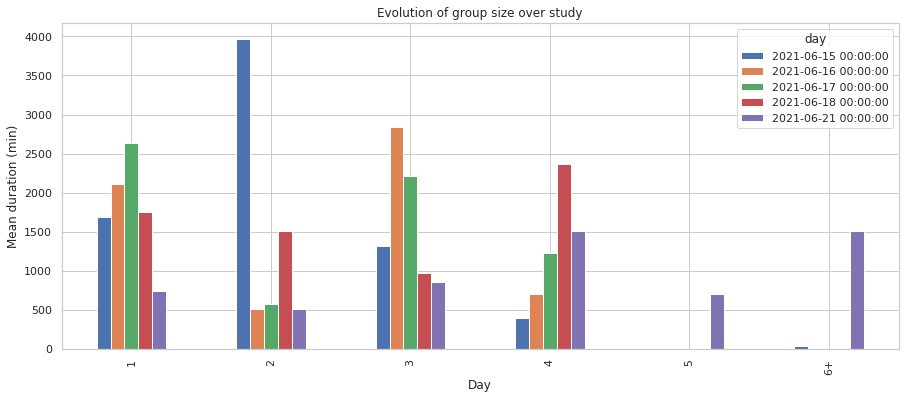

In [26]:
fig, ax = plt.subplots(figsize=(15, 6))

df=interactions_group.groupby(["day", "nb_children"]).duration.sum().to_frame().reset_index()
df["duration_min"]=df.duration/60

df.groupby(["day", "nb_children"]).duration.sum().unstack(0).plot.bar(ax=ax)

ax.set(xlabel="Day",
       ylabel="Mean duration (min)",
       title="Evolution of group size over study")



pass

/home/severin/.local/lib/python3.8/site-packages/seaborn/distributions.py:375: UserWarning: `bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.
  warnings.warn(msg, UserWarning)


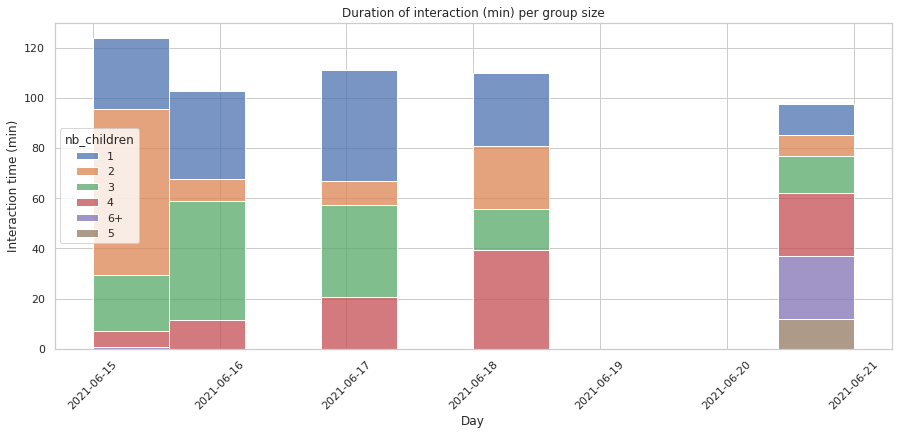

In [27]:

fig, ax = plt.subplots(figsize=(15, 6))

sns.histplot(df, x='day', hue='nb_children', weights='duration_min', multiple='stack')

ax.set(xlabel="Day",
       ylabel="Interaction time (min)",
       title="Duration of interaction (min) per group size")


plt.xticks(rotation=45)
pass

# Activities

In [28]:
acts = actions.reset_index()
acts = acts[~acts.status.str.contains("mood")]
acts = acts[~acts.status.str.contains("unknown")]
acts = acts[acts.activity != "default"]

d={"day":[], "timeofday":[], "activity":[], "duration":[]}

for i in range(len(acts)-1):

    row = acts.iloc[i]
    row_n = acts.iloc[i+1]
    if row["status"] == "running":
        if row_n["status"] == "running":
            continue
        d["timeofday"].append(row.timeofday)
        d["day"].append(row.day)
        d["activity"].append(row.activity)
        d["duration"].append((row_n.timeofday-row.timeofday))
    
activities = pd.DataFrame(d)
activities["duration"] = activities.duration.astype('timedelta64[100ms]')/10
activities

,day,timeofday,activity,duration
0,2021-06-15,1970-01-01 08:37:25.677580032,mood board,8.4
1,2021-06-15,1970-01-01 08:44:44.871941120,mood board,17.4
2,2021-06-15,1970-01-01 08:45:02.301182976,fun dances,12.2
3,2021-06-15,1970-01-01 08:45:14.573605120,mood board,38.3
4,2021-06-15,1970-01-01 08:45:52.962519040,relaxing sounds,10.5
...,...,...,...,...
720,2021-06-21,1970-01-01 13:44:03.469551104,mood board,68.1
721,2021-06-21,1970-01-01 13:45:11.664960000,story,102.2
722,2021-06-21,1970-01-01 13:47:30.217917952,mood board,21.0
723,2021-06-21,1970-01-01 13:47:51.251597824,listening,37.3


In [29]:
activities_count = activities[activities.activity != "mood board"].groupby(["day","activity"]).count().reset_index()
activities_count

,day,activity,timeofday,duration
0,2021-06-15,calm dances,5,5
1,2021-06-15,calm music,6,6
2,2021-06-15,cuddle,8,8
3,2021-06-15,fun dances,11,11
4,2021-06-15,jokes,14,14
5,2021-06-15,listening,8,8
6,2021-06-15,relaxing sounds,5,5
7,2021-06-15,story,4,4
8,2021-06-16,calm music,7,7
9,2021-06-16,cuddle,8,8


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

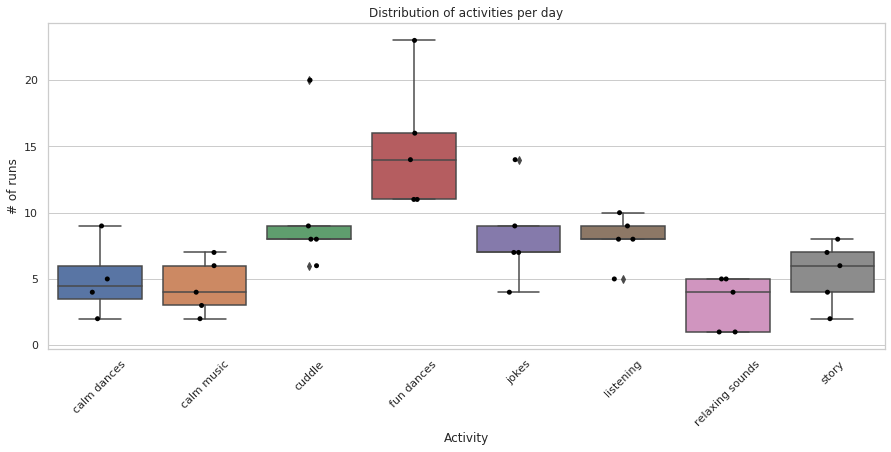

In [45]:
fig, ax = plt.subplots(figsize=(15, 6))

sns.boxplot(data=activities_count,x="activity",y="duration", ax=ax)
sns.stripplot(data=activities_count,x="activity",y="duration", color='black', ax=ax)

ax.set(xlabel="Activity",
       ylabel="# of runs",
       title="Distribution of activities per day")

plt.xticks(rotation=45)

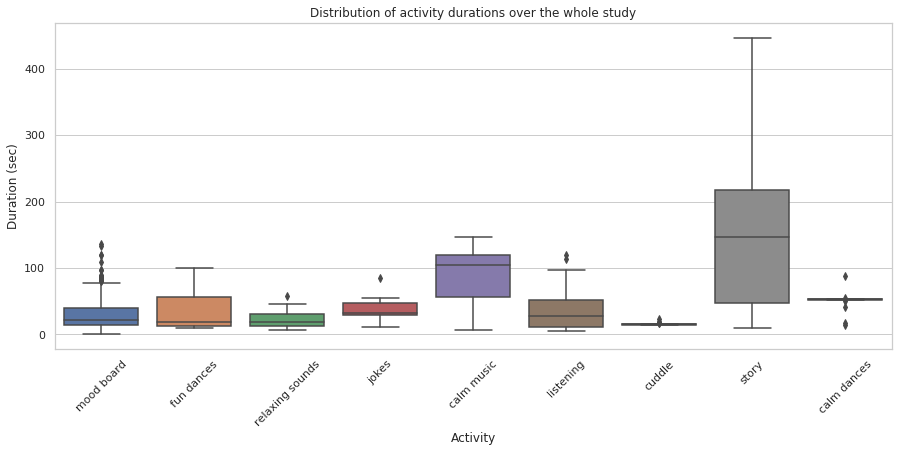

In [31]:
fig, ax = plt.subplots(figsize=(15, 6))

sns.boxplot(data=activities,x="activity",y="duration", ax=ax)

ax.set(xlabel="Activity",
       ylabel="Duration (sec)",
       title="Distribution of activity durations over the whole study")

plt.xticks(rotation=45)
pass

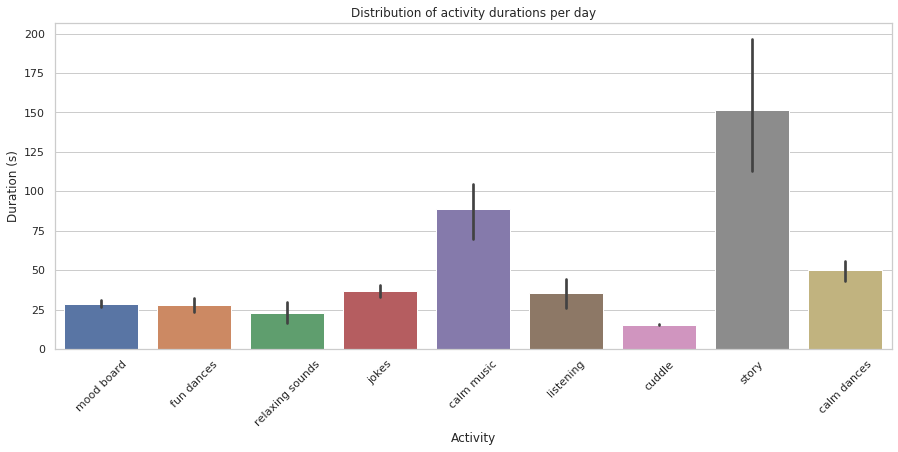

In [32]:
fig, ax = plt.subplots(figsize=(15, 6))

sns.barplot(data=activities,x="activity",y="duration")

ax.set(xlabel="Activity",
       ylabel="Duration (s)",
       title="Distribution of activity durations per day")

plt.xticks(rotation=45)
pass

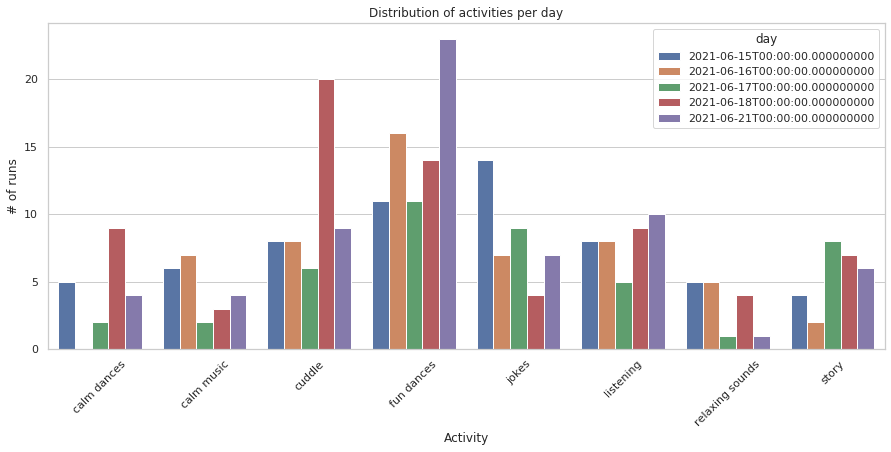

In [33]:
fig, ax = plt.subplots(figsize=(15, 6))

sns.barplot(data=activities_count,hue='day',x="activity",y="duration")

ax.set(xlabel="Activity",
       ylabel="# of runs",
       title="Distribution of activities per day")

plt.xticks(rotation=45)
pass

## Total time spent in the different activities

Total interaction time with the robot:

In [34]:
#activities["duration"] = pd.to_timedelta(activities.duration,unit="s")
pd.Timedelta(activities.duration.sum(), unit="s")

Timedelta('0 days 07:09:32.500000')

Interaction time per day:

In [35]:
interaction_time_per_day = pd.to_timedelta(activities.groupby("day").duration.sum(), unit="s")
interaction_time_per_day

day
2021-06-15          0 days 01:27:41
2021-06-16   0 days 01:27:25.500000
2021-06-17   0 days 01:11:39.800000
2021-06-18   0 days 01:38:01.400000
2021-06-21   0 days 01:24:44.800000
Name: duration, dtype: timedelta64[ns]

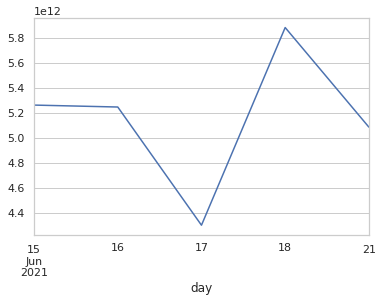

In [36]:
interaction_time_per_day.plot()

### Interaction time per activity

In [37]:
activities.groupby(["day", "activity"]).duration.sum().to_frame()

duration
day        activity                 
2021-06-15 calm dances         229.9
           calm music          486.1
           cuddle              120.3
           fun dances          214.6
           jokes               602.2
           listening           406.5
           mood board         2774.7
           relaxing sounds     147.6
           story               279.1
2021-06-16 calm music          564.9
           cuddle              138.6
           fun dances          593.3
           jokes               287.5
           listening           246.8
           mood board         3062.9
           relaxing sounds     116.1
           story               235.4
2021-06-17 calm dances          67.6
           calm music          146.1
           cuddle               91.4
           fun dances          425.2
           jokes               282.1
           listening           266.3
           mood board         1725.7
           relaxing sounds      19.4
           story              1276.0
2021-06-18 calm dances         496.4
           calm music          272.7
           cuddle              299.9
           fun dances          353.9
           jokes               126.8
           listening           374.9
           mood board         2578.7
           relaxing sounds      79.0
           story              1299.1
2021-06-21 calm dances         211.6
           calm music          482.7
           cuddle              135.9
           fun dances          493.5
           jokes               218.6
           listening           125.1
           mood board         2398.5
           relaxing sounds       9.7
           story              1009.2

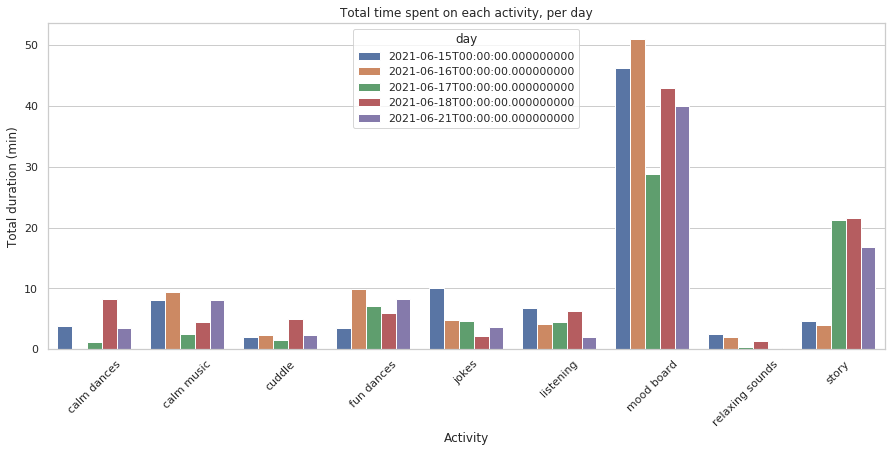

In [38]:
fig, ax = plt.subplots(figsize=(15, 6))


df=activities.groupby(["day", "activity"]).duration.sum().to_frame().reset_index()
df["duration_min"]=df.duration/60

sns.barplot(data=df, y="duration_min", x="activity", hue="day")

ax.set(xlabel="Activity",
       ylabel="Total duration (min)",
       title="Total time spent on each activity, per day")

plt.xticks(rotation=45)
pass
